# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [7]:
import pandas as pd
import numpy as np

def montecarlo(f, N, a, b):
    u = np.random.uniform(a,b,N)
    return np.mean(f(u))*(b-a)

N = [10, 100, 1000, 10000, 100000] 
table = pd.DataFrame(columns=["Aproximación 1","Error 1", "Aproximación 2","Error 2"], index=N)

def f1(x):
    return np.exp(x)*np.log10(x)

def f2(x):
    return np.sin(x)*np.log(x)


for i in N:
    aprox1 = montecarlo(f1, int(i), 1, 3)
    aprox2 = montecarlo(f2, int(i), 1, 3)
    table.loc[i,"Aproximación 1"] = aprox1
    table.loc[i,"Aproximación 2"] = aprox2
    table.loc[i, "Error 1"] = np.abs(6.09207- aprox1)
    table.loc[i, "Error 2"] = np.abs(0.869844- aprox2)
table

,Aproximación 1,Error 1,Aproximación 2,Error 2
10,4.187714,1.904356,0.922547,0.052703
100,5.660441,0.431629,0.860873,0.008971
1000,5.862633,0.229437,0.855699,0.014145
10000,6.136734,0.044664,0.869888,0.000044
100000,6.110536,0.018466,0.870404,0.00056


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def bernoulli(x,y):
    return (x**2 + 2*y**2 <= -2*x + 8*y - 7)

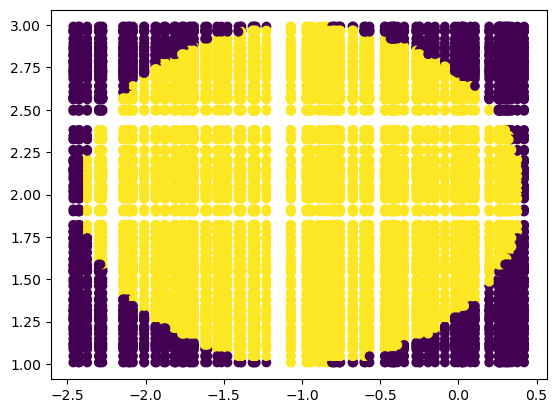

In [13]:
x = np.random.uniform(-2.5, 0.5, 100)
y = np.random.uniform(1, 3, 100)

X, Y = np.meshgrid(x, y)
plt.figure()
plt.scatter(X, Y, c=bernoulli(X, Y))

In [19]:
def montecarlo2(region, ax, bx, ay, by, N):
    x = np.random.uniform(ax, bx, N)
    y = np.random.uniform(ay, by, N)
    B = region(x, y)
    AR = (bx - ax)*(by -ay)
    return np.mean(B)*AR

def C (AD, AR) :
    return(np.sqrt((1-AD/AR)/(AD/AR)))

AR = (0.5 - (-2.5))*(3 - 1)

N = [10, 100, 1000, 10000, 100000] 
table1 = pd.DataFrame(columns=["Aproximación","Error relativo"], index=N)
for i in N:
    AD = montecarlo2(bernoulli, -2.5, 0.5, 1, 3, int(i))
    table1.loc[i,"Aproximación"] = AD
    error_relativo = np.log10(C(AD, AR)) - np.log(i)/2
    table1.loc[i,"Error relativo"] = error_relativo
    
table1

,Aproximación,Error relativo
10,4.8,-1.452323
100,4.14,-2.476329
1000,4.422,-3.677634
10000,4.452,-4.834562
100000,4.44984,-5.985447


3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

##### 1. Avalúo de riesgos sísmicos

La integración Montecarlo puede emplearse para estimar la probabilidad de que una estructura supere ciertos niveles de deformación o daño debido a eventos sísmicos, lo que es crucial para evaluar la seguridad de las estructuras.

##### 2. Optimización de diseños y costos

Se puede utilizar la integración Montecarlo en procesos de optimización para encontrar diseños eficientes que cumplan con ciertos criterios, teniendo en cuenta incertidumbres en los parámetros de diseño y costos.

##### 3. Hidráulica

La integración Montecarlo se puede utilizar para simular diferentes condiciones hidrológicas y calcular caudales, riesgos de inundación y otros parámetros importantes en el diseño de infraestructuras hidráulicas.

## Fuentes consultadas
- Flores, F. (2015) *Aplicación del método de Monte Carlo en la planificación de proyectos de Ingeniería Civil*, Universidad de Chile, https://repositorio.uchile.cl/handle/2250/132649

- Marengo, H.; Arreguín, F.; Romero, I. (2010), *Evaluación de riesgos en proyectos hidráulicos de ingeniería. Incertidumbres y confiabilidad*, Tecnología y Ciencias del Agua, https://www.scielo.org.mx/pdf/tca/v1n4/v1n4a1.pdf

- Gago, A. (2017) *Aplicando el método de Montecarlo a la dirección de proyectos* https://es.linkedin.com/pulse/aplicando-el-m%C3%A9todo-de-montecarlo-la-direcci%C3%B3n-andr%C3%A9s-gago-pmp-mbf